In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN

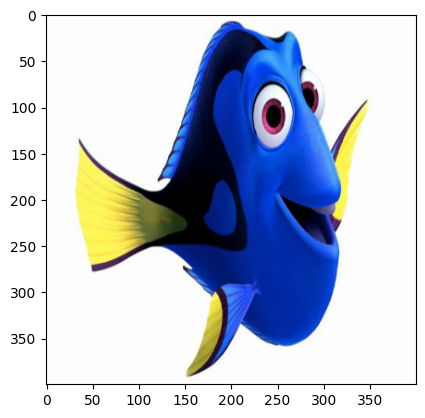

In [3]:
image = cv2.imread("dory.png")
image = cv2.resize(image,(400,400))
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

In [4]:
image_hsv = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2HSV)

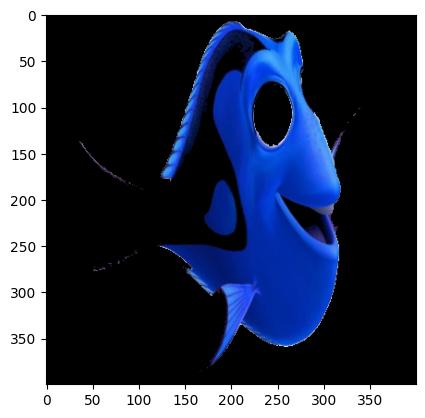

In [9]:
light_color_blue=(100,50,50)
dark_color_blue = (140,255,255)
mask_blue = cv2.inRange(image_hsv,light_color_blue,dark_color_blue)
result_blue = cv2.bitwise_and(image_rgb,image_rgb,mask=mask_blue)
plt.imshow(result_blue,cmap="gray")
plt.show()

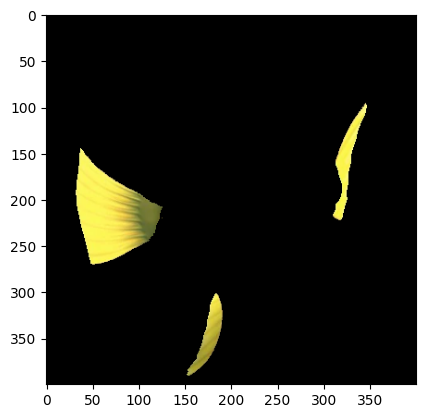

In [10]:
light_color_yellow=(20,100,100)
dark_color_yellow = (40,255,255)
mask_yellow = cv2.inRange(image_hsv,light_color_yellow,dark_color_yellow)
result_yellow = cv2.bitwise_and(image_rgb,image_rgb,mask=mask_yellow)
plt.imshow(result_yellow,cmap="gray")
plt.show()

In [12]:
output = cv2.add(mask_blue , mask_yellow)

In [ ]:
image_hsv_pix_list = image_hsv.reshape(-1,3)

X_train = image_hsv_pix_list / 255
Y_train = output.reshape(-1,) // 255

knn = KNN(3)
knn.fit(X_train,Y_train)


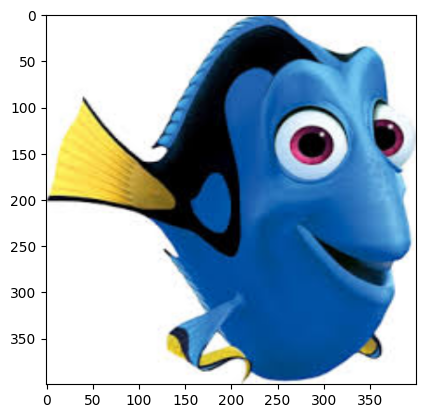

In [23]:
image_test = cv2.imread("dash_dory.png")
image_test =  cv2.resize(image_test,(400,400))
image_test = cv2.cvtColor(image_test,cv2.COLOR_BGR2RGB)
image_test_hsv = cv2.cvtColor(image_test, cv2.COLOR_RGB2HSV)

image_test_hsv_pix_list = image_test_hsv.reshape(-1,3)
X_test = image_test_hsv_pix_list / 255

plt.imshow(image_test,cmap="gray")
plt.show()

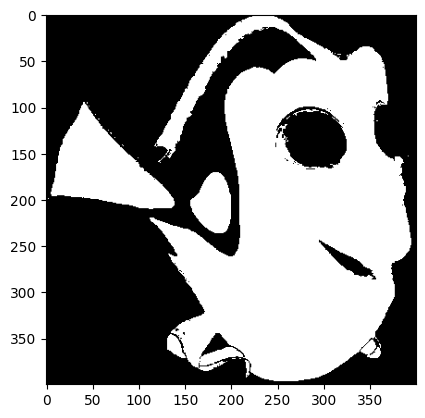

In [ ]:
Y_pred = knn.predict(X_test)

output = Y_pred.reshape(image_test.shape[:2])
plt.imshow(output,cmap="gray")
plt.show()

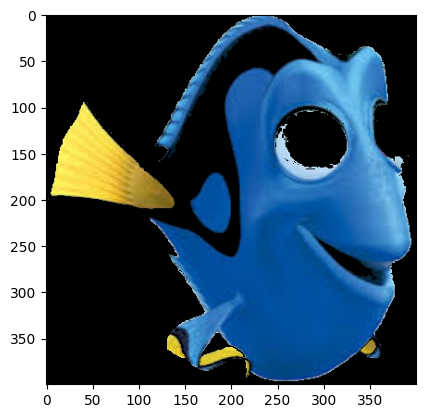

In [20]:
result = cv2.bitwise_and(image_test,image_test,mask=output)
plt.imshow(result)
plt.show()

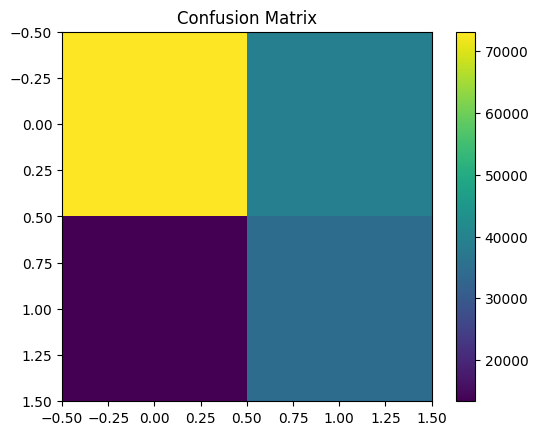

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_train,Y_pred)
plt.imshow(cm)
plt.colorbar()
plt.title("Confusion Matrix")
plt.show()